# Notebook for exploring different types of data in ABIDE preprocessed

In [13]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../src/features')

from subject import Subject

cur_dir = os.getcwd()
abide_dir = os.path.dirname(os.path.dirname(cur_dir)) + '/abide/'
roi_200_dir = abide_dir + 'o_test_func_mean_ccs_nofilt_noglobal/Outputs/cpac/nofilt_noglobal/rois_cc200/'
os.path.exists(roi_200_dir)

False

# Analysis on Phenotypes of Patients

In [2]:
phen_file = abide_dir + 'Phenotypic_V1_0b_preprocessed1.csv'
phen_df = pd.read_csv(phen_file)
for c in phen_df.columns:
    print(c)

Unnamed: 0
Unnamed: 0.1
SUB_ID
X
subject
SITE_ID
FILE_ID
DX_GROUP
DSM_IV_TR
AGE_AT_SCAN
SEX
HANDEDNESS_CATEGORY
HANDEDNESS_SCORES
FIQ
VIQ
PIQ
FIQ_TEST_TYPE
VIQ_TEST_TYPE
PIQ_TEST_TYPE
ADI_R_SOCIAL_TOTAL_A
ADI_R_VERBAL_TOTAL_BV
ADI_RRB_TOTAL_C
ADI_R_ONSET_TOTAL_D
ADI_R_RSRCH_RELIABLE
ADOS_MODULE
ADOS_TOTAL
ADOS_COMM
ADOS_SOCIAL
ADOS_STEREO_BEHAV
ADOS_RSRCH_RELIABLE
ADOS_GOTHAM_SOCAFFECT
ADOS_GOTHAM_RRB
ADOS_GOTHAM_TOTAL
ADOS_GOTHAM_SEVERITY
SRS_VERSION
SRS_RAW_TOTAL
SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
SCQ_TOTAL
AQ_TOTAL
COMORBIDITY
CURRENT_MED_STATUS
MEDICATION_NAME
OFF_STIMULANTS_AT_SCAN
VINELAND_RECEPTIVE_V_SCALED
VINELAND_EXPRESSIVE_V_SCALED
VINELAND_WRITTEN_V_SCALED
VINELAND_COMMUNICATION_STANDARD
VINELAND_PERSONAL_V_SCALED
VINELAND_DOMESTIC_V_SCALED
VINELAND_COMMUNITY_V_SCALED
VINELAND_DAILYLVNG_STANDARD
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_PLAY_V_SCALED
VINELAND_COPING_V_SCALED
VINELAND_SOCIAL_STANDARD
VINELAND_SUM_SCORES
VINELAND_ABC_ST

In [9]:
sites_s = set(phen_df['SITE_ID'])
sites_d = {}
print(len(sites_s))
for i, s in enumerate(sites_s):
    print(s, i)
    sites_d[s] = i

20
YALE 0
UCLA_1 1
MAX_MUN 2
TRINITY 3
OHSU 4
UCLA_2 5
CALTECH 6
UM_2 7
CMU 8
OLIN 9
LEUVEN_1 10
UM_1 11
KKI 12
LEUVEN_2 13
NYU 14
STANFORD 15
USM 16
PITT 17
SBL 18
SDSU 19


In [4]:
# Look at Gender distribution
genders = list(phen_df['SEX'])
print(genders.count(1))
print(genders.count(2))

948
164


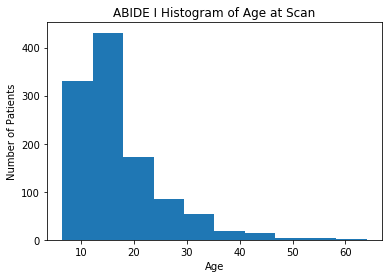

In [7]:
# Look at Age at scanning
ages = list(phen_df['AGE_AT_SCAN'])
plt.title('ABIDE I Histogram of Age at Scan')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.hist(ages)
plt.savefig('./../imgs/age_at_scan_hist.png')

1112
539
573


(array([539.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 573.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

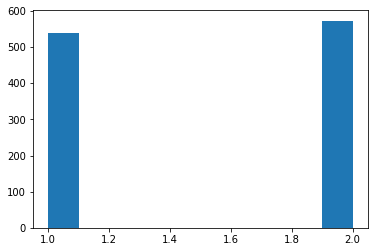

In [10]:
diags = list(phen_df['DX_GROUP'])
print(len(diags))
print(diags.count(1))
print(diags.count(2))
plt.hist(diags)

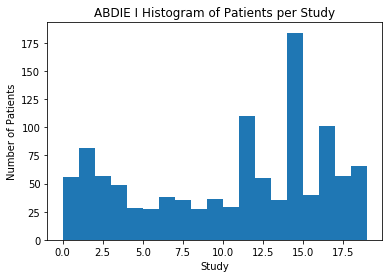

In [27]:
# Patients per study
sites = list(phen_df['SITE_ID'])
sites_l = list()
for s in sites:
    sites_l.append(sites_d[s])
plt.title('ABDIE I Histogram of Patients per Study')
plt.xlabel('Study')
plt.ylabel('Number of Patients')
plt.hist(sites_l, bins = range(0,len(sites_d)))
plt.savefig('./../imgs/study_hist.png')

In [37]:
# Look at distribution of FIQ in dataset by diags
fiq_c = list()
fiq_a = list()
for index, row in phen_df.iterrows():
    if(row['DX_GROUP'] == 1):
        fiq_a.append(row['FIQ'])
    else:
        fiq_c.append(row['FIQ'])
fiq_a = [fiq for fiq in fiq_a if fiq > 0]
fiq_c = [fiq for fiq in fiq_c if fiq > 0]

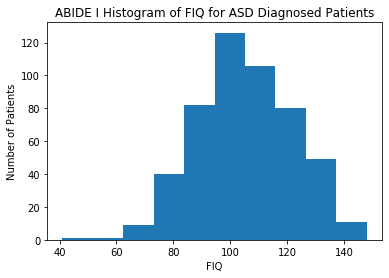

In [40]:
# hist of fiq for ASD patients
plt.title("ABIDE I Histogram of FIQ for ASD Diagnosed Patients")
plt.xlabel("FIQ")
plt.ylabel("Number of Patients")
plt.hist(fiq_a)
plt.savefig('./../imgs/fiq_hist_asd.png')

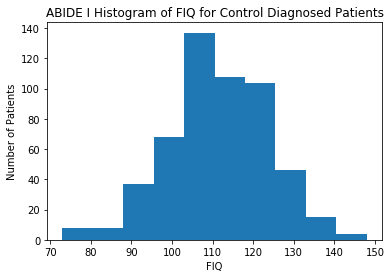

In [41]:
# hist of fiq for Control patients
plt.title("ABIDE I Histogram of FIQ for Control Diagnosed Patients")
plt.xlabel("FIQ")
plt.ylabel("Number of Patients")
plt.hist(fiq_c)
plt.savefig('./../imgs/fiq_hist_control.png')

In [49]:
# Look at the drugs the patients are on
drugs = list(phen_df['MEDICATION_NAME'])
drugs_l = list()
num_drugs = list()
drugs_s = set()
for d in drugs:
    if(type(d) == str):
        d_s = d.split(';')
        drugs_l.append(d_s)
        num_drugs.append(len(d_s))
        for m in d_s:
            drugs_s.add(m)
drugs_d = {}
for i, d in enumerate(drugs_s):
    drugs_d[d] = i
    print(d, i)
    
drugs_c = list()
for d in drugs_l:
    for m in d:
        drugs_c.append(drugs_d[m])

 dextroamphetamine and amphetamine 0
Methylphenidate Extended Release 1
 2
Methylphanidate 3
Allegra 4
 Citaopram 5
 Amphetamine and dextroamphetamine 6
 Bupropion 7
Ziprasidone 8
Guanfacine Extended Release 9
 Clonidine 10
 Dexedrine 11
Paroxetine 12
Methylphenidate transdermal patch 13
Fluoxetine 14
CoQ10  15
 Lithium 16
 Trazodone 17
Antidepressant 18
 Methylphenidate 19
Sertraline 20
 Valproic Acid 21
Atomoxetine hydrochloride 22
 Citalopram 23
Methylphenidate extended release 24
 Merthylphenidate Extended Release 25
Eszopiclone 26
 Bupropion Extended Release 27
Benperidol 28
 Dexmethylphenidate 29
 Oxcarbazepine 30
Pantoprazole 31
 Methylphenidated Extended release 32
0 33
Levothyroxine 34
 Methylphenydate 35
 Risperidone 36
Mirtazapine 37
Citolopram 38
 Zinc 39
Merthylphenidate Extended Release 40
Bupropion 41
Lisdexamfetamine 42
 Paliperidone 43
 Ziprasidone 44
 Lithium Carbonate 45
 Sertraline 46
 Peroxatine 47
 altrex 48
 Trazadone 49
Dextroamphetamine and amphetamine 50
 Dext

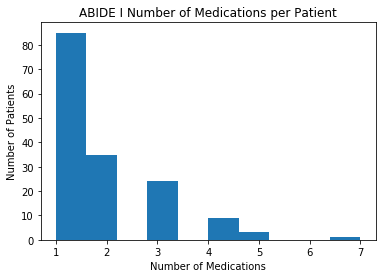

In [51]:
# histogram of number of drugs each patients is on
plt.title('ABIDE I Number of Medications per Patient')
plt.xlabel('Number of Medications')
plt.ylabel('Number of Patients')
plt.hist(num_drugs)
plt.savefig('./../imgs/hist_num_medications.png')

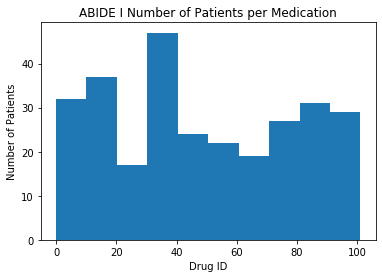

In [55]:
# Histogram of Number of appearances of each medication
plt.title('ABIDE I Number of Patients per Medication')
plt.xlabel('Drug ID')
plt.ylabel('Number of Patients')
plt.hist(drugs_c)
plt.savefig('./../imgs/hist_num_per_medication.png')

In [12]:
roi_files = os.listdir(roi_200_dir)
sub_roi_d = {}
time_steps = list()
vals = list()
for file in roi_files:
    data = list()
    with open(str(os.path.join(roi_200_dir, file)), newline='') as f:
        Lines = f.readlines()
        for l in Lines[1:]:
            ts = np.empty((200,))
            for n, i in enumerate(l.split("\t")):
                ts[n] = i
                vals.append(i)
            data.append(ts)
    subj_id = file.split("_")[-3][2:]
    if(subj_id in sub_roi_d):
        print(file)
    sub_roi_d[subj_id] = data
    time_steps.append(len(data))

In [13]:
len(vals)

33981000

In [ ]:
plt.hist(vals, bins=30)

(array([1381439., 1268568., 1247378., 1227205., 1222242., 1243023.,
        1209231., 1194365., 1185655., 1185113., 1165433., 1161659.,
        1165949., 1153888., 1147482., 1132184., 1120024., 1093192.,
        1094256., 1096570., 1077823., 1050394., 1048854., 1041323.,
        1030877., 1022389., 1016165., 1008065., 1000037.,  990217.]),
 array([       0.        ,   983028.76666667,  1966057.53333333,
         2949086.3       ,  3932115.06666667,  4915143.83333333,
         5898172.6       ,  6881201.36666667,  7864230.13333333,
         8847258.9       ,  9830287.66666667, 10813316.43333333,
        11796345.2       , 12779373.96666667, 13762402.73333333,
        14745431.5       , 15728460.26666667, 16711489.03333334,
        17694517.8       , 18677546.56666667, 19660575.33333334,
        20643604.1       , 21626632.86666667, 22609661.63333333,
        23592690.4       , 24575719.16666667, 25558747.93333333,
        26541776.7       , 27524805.46666667, 28507834.23333333,
        

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001D3AAA0AEA0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
plt.hist(time_steps)

In [ ]:
subj_ids = set(sub_roi_d.keys())
sub_diag_d = {}
sub_site_d = {}
diags = list()
sites = list()
for index, row in phen_df.iterrows():
    if(str(row['SUB_ID']) in subj_ids):
        sub_diag_d[row['SUB_ID']] = (row['DX_GROUP'], row['DSM_IV_TR'])
        sub_diag_d[row['SUB_ID']] = row['SITE_ID']
        diags.append(row['DX_GROUP'])
        sites.append(row['SITE_ID'])

In [ ]:
plt.hist(diags)

In [ ]:
plt.hist(sites)

In [ ]:
t_rois = sub_roi_d['50012']
for ts in t_rois:
    print(ts)

# Analysis with subjects
* tr distributions
* Sex
* asd
* age

In [1]:
# Load ABIDEI preprocessed rois by loading subjects
def open_pickle(f):
    file = open(f,'rb')
    o = pickle.load(file)
    file.close()
    return o

def load_subjects_d(subject_folder):
    subjects_d = {}
    for f in os.listdir(subject_folder):
        s = open_pickle(os.path.join(subject_folder, f))
        subjects_d[s._sub_id] = s
    return subjects_d

In [3]:
def clean_subjects(subjects, trs=[2, 2.17]):
    clean_s = list()
    trs = set(trs)
    for s in subjects:
        if(s._tr in trs):
            clean_s.append(s)
    print(f'{len(clean_s)} clean out of {len(subjects)}')
    return clean_s

In [9]:
ab_subjects_dir = os.path.dirname(cur_dir) + '/data/ABIDEI_subjects/'
ab2_subjects_dir = os.path.dirname(cur_dir) + '/data/ABIDEII_subjects/'

In [18]:
ab_subjects_d = load_subjects_d(ab_subjects_dir)
ab_subjects = list(ab_subjects_d.values())
ab_subjects_c = clean_subjects(ab_subjects)

548 clean out of 884


In [19]:
ab2_subjects_d = load_subjects_d(ab2_subjects_dir)
ab2_subjects = list(ab2_subjects_d.values())
ab2_subjects_c = clean_subjects(ab2_subjects)

401 clean out of 458


In [20]:
ab_subjects.extend(ab2_subjects)
print(len(ab_subjects))
ab_subjects_c.extend(ab2_subjects_c)
print(len(ab_subjects_c))

1342
949


# Tr distribution


In [22]:
trs = list()
for s in ab_subjects:
    trs.append(s._tr)

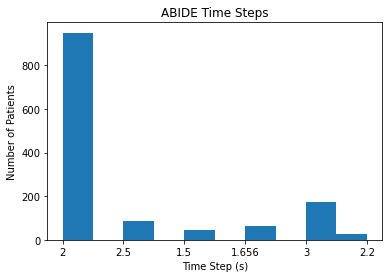

In [26]:
plt.title('ABIDE Time Steps')
plt.xlabel('Time Step (s)')
plt.ylabel('Number of Patients')
plt.hist(trs)
plt.savefig('./../imgs/hist_abide_trs.png')

In [27]:
sex = list()
for s in ab_subjects_c:
    sex.append(s._sex)

In [29]:
sex.count(1)

793

In [30]:
sex.count(2)

156

In [31]:
ages = list()
for s in ab_subjects_c:
    ages.append(s._age)

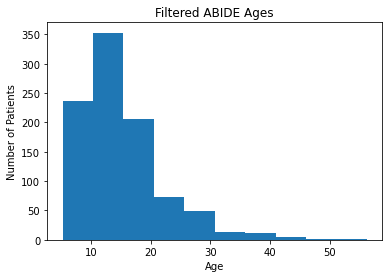

In [37]:
plt.title('Filtered ABIDE Ages')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.hist(ages)
plt.savefig('./../imgs/hist_abide_c_ages.png')

In [36]:
asd = list()
for s in ab_subjects_c:
    asd.append(s._label_dict['dx_group'])

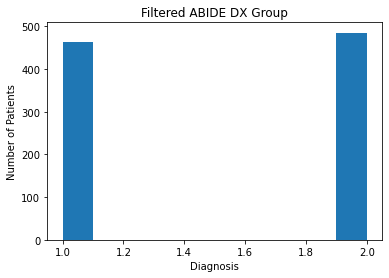

In [38]:
plt.title('Filtered ABIDE DX Group')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.hist(asd)
plt.savefig('./../imgs/hist_abide_c_asd.png')

In [40]:
asd.count(1)

464

In [41]:
asd.count(2)

485